# Computer Vision for Beginners: Part 4

This is the second part of OpenCV tutorial for beginners and the complete set of the series is as follows:

- Part 1: Understanding color models and drawing figures on images 
- Part 2: The basics of image processing with filtering and gradients
- Part 3: From feature detection to face detection
- ***Part 4: Contour detection and having a little bit of fun***

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dir = '../'

In [3]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

From the first series, we saw how to draw a figure on an image. We also talked about how to apply blurring and thresholding with various options. And in part 3, we discussed several detection algorithms including edge detection. There is another detection technique called contour detection which is essential in object detection. And after that, we're going to round up this series with a little bit of fun playing with masking.

## Contour Detection

You may be already familiar with the word 'contour.' I've used this term several times in previous posts. ***[A contour line](https://en.wikipedia.org/wiki/Contour_line)*** indicates a curved line representing the boundary of the same values or the same intensities. A contour map is the most straightforward example we can think of.
<br>
But then you may ask this. What's the difference between edges and contours? The two terms are often used interchangeably so it could be a bit confusing. To put it simply, the concept of edges lies in a local range while the concept of contours is at the overall boundary of a figure. Edges are points whose values change significantly compared to their neighboring points. Contours, on the other hand, are closed curves which are obtained from edges and depicting a boundary of figures. You can find a further explanation [here](https://stackoverflow.com/questions/17103735/difference-between-edge-detection-and-image-contours).

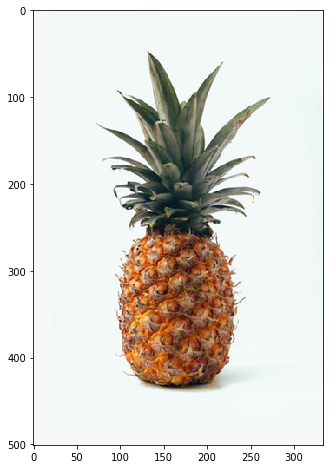

In [4]:
# load the image
img = cv2.imread(dir + 'images/pine_apple.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

So what we're going to do is detecting the contour of this pineapple. Before applying the detection algorithm, we need to convert the image into grayscale and apply thresholding as follows. All of these steps are what we've discussed in the previous series.

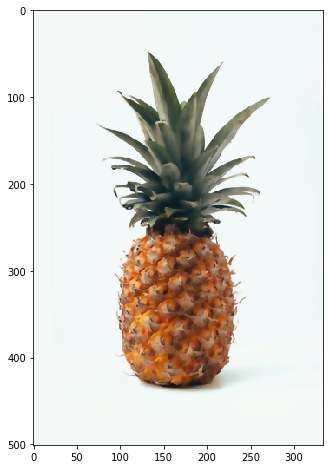

In [5]:
# Blurring for removing the noise 
img_blur = cv2.bilateralFilter(img, d = 7, 
                               sigmaSpace = 75, sigmaColor =75)
display(img_blur)

In [7]:
# Convert to grayscale 
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)

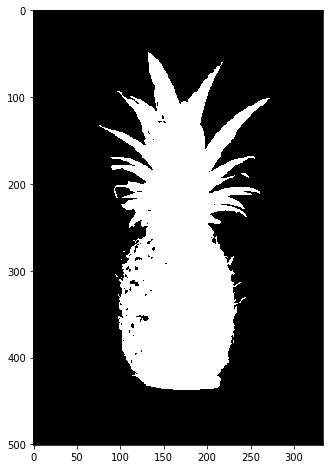

In [8]:
# Apply the thresholding  
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a/2+60, a, cv2.THRESH_BINARY_INV)
display(thresh, cmap = 'gray')

Contour detection can be implemented by the function `cv2.findContours()` in OpenCV and there are two important parameters here. `mode` is the way of finding contours, and method is the approximation `method` for the detection. I ask you to find other information from [the documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#findcontours).

In [9]:
# Find the contour of the figure 
image, contours, hierarchy = cv2.findContours(thresh, 
                                              mode = cv2.RETR_TREE, 
                                              method = cv2.CHAIN_APPROX_SIMPLE)

The mode `cv2.RETR_TREE` finds all the promising contour lines and reconstructs a full hierarchy of nested contours. The method `cv2.CHAIN_APPROX_SIMPLE` returns only the endpoints that are necessary for drawing the contour line. And as you can see above, this function gives the image, the detected contours and their hierarchy as its output. <br>
The returned contour is a list of points consisting of the contour lines. To draw the outer line of the figure, we'll sort the contours by their area. With the selected contour line, `cv2.drawContours()` will depict the bounding line along with the points as below.

In [12]:
# Sort the contours 
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

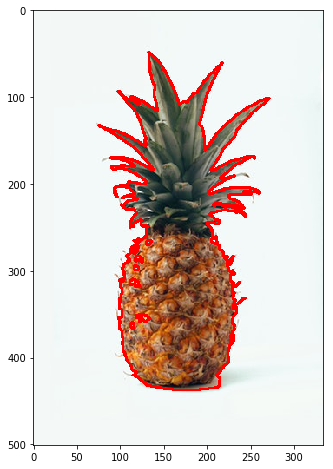

In [29]:
# Draw the contour 
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
display(img_copy)

It's simple, right? Although the shadow is also added at the bottom, the outcome is pretty satisfactory.

## More about contours

There are more things we can do with the contour. We can find the centroid of an image or calculate the area of a boundary field with the help of the notion called image moment. What does a moment mean here? The word 'moment' is a very short period of time in common usage. But in physics terminology, **[a moment](https://en.wikipedia.org/wiki/Moment_(physics))** is the product of the distance and another physical quantity meaning how a physical quantity is distributed or located. So in computer vision, ***[Image moment](https://en.wikipedia.org/wiki/Image_moment)*** is how image pixel intensities are distributed according to their location. It's a weighted average of image pixel intensities and we can get the centroid or spatial information from the image moment.
<br>
![img](https://github.com/jjone36/vision_4_beginners/blob/master/images/part4_img1.png?raw=true)
<br>
There are three types of moments- spatial moments, central moments, and central normalized moments. We can get the image moment with the function `cv2.moments()` in OpenCV and it returns 24 different moments. If you print the output `M` as shown below, it'll return the 24 moments in a dictionary format.

In [31]:
len(c_0)
for c in c_0:
    x, y = c[0]
    if y == 145:
        print(c)


[[129 145]]
[[111 145]]
[[110 145]]
[[232 145]]
[[197 145]]


In [14]:
# The first order of the contours
c_0 = contours[0]
c_0

array([[[132,  48]],

       [[133,  49]],

       [[133,  59]],

       ...,

       [[140,  54]],

       [[139,  54]],

       [[133,  48]]], dtype=int32)

In [14]:
# image moment
M = cv2.moments(c_0)
print(M.keys())

dict_keys(['m00', 'm10', 'm01', 'm20', 'm11', 'm02', 'm30', 'm21', 'm12', 'm03', 'mu20', 'mu11', 'mu02', 'mu30', 'mu21', 'mu12', 'mu03', 'nu20', 'nu11', 'nu02', 'nu30', 'nu21', 'nu12', 'nu03'])


I'd like to focus on the implementation of the image moments here. Additional reading resources can be found at the end of this article if you may have an interest. <br>
To get the area of the contours, we can implement the function `cv2.contourArea()`. Why don't we try several contours here? If you input the first, second and third contours, you'll get the decreasing values as shown below. This shows that the contour detection algorithm forms the hierarchy of the detected boundaries.

In [15]:
# The area of contours 
print("1st Contour Area : ", cv2.contourArea(contours[0]))
print("2nd Contour Area : ", cv2.contourArea(contours[1]))
print("3rd Contour Area : ", cv2.contourArea(contours[2]))

1st Contour Area :  37554.5
2nd Contour Area :  75.0
3rd Contour Area :  54.0


The arc length of the contour can be obtained by the function `cv2.arcLength()`. The parameter `closed` indicates whether the curve should be closed or not.

In [16]:
# The length of contours 
print("1st Contour Arc Length (Closed): ", cv2.arcLength(contours[0], closed = True))
print("1st Contour Arc Length (Open): ", cv2.arcLength(contours[0], closed = False))

1st Contour Arc Length (Closed):  2473.3190953731537
1st Contour Arc Length (Open):  2472.3190953731537


Now let's try plotting the centroid and the extreme points of our pineapple. We can get the centroid point with the formula as follows.

In [17]:
# The centroid point
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

The extrema are the endpoints on the left and right, at the top and bottom. And we can arrange x and y coordinates separately as follows.

In [18]:
# The extreme points
l_m = tuple(c_0[c_0[:, :, 0].argmin()][0])
r_m = tuple(c_0[c_0[:, :, 0].argmax()][0])
t_m = tuple(c_0[c_0[:, :, 1].argmin()][0])
b_m = tuple(c_0[c_0[:, :, 1].argmax()][0])

pst = [l_m, r_m, t_m, b_m]
xcor = [p[0] for p in pst]
ycor = [p[1] for p in pst]

Now let's plot all these points on the image.

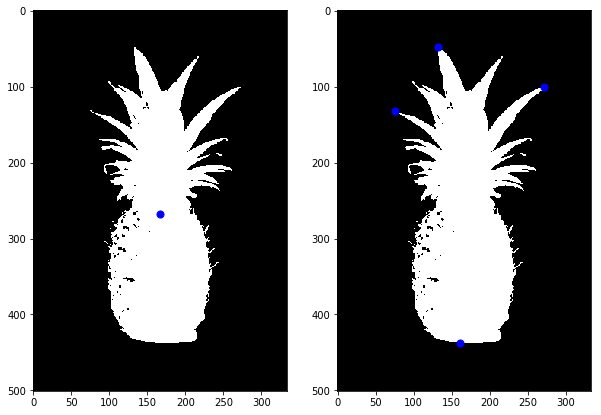

In [19]:
# Plot the points
plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap = 'gray')
plt.scatter([cx], [cy], c = 'b', s = 50)

plt.subplot(1, 2, 2)
plt.imshow(image, cmap = 'gray')
plt.scatter(xcor, ycor, c = 'b', s = 50)

## Other shapes of contours

Besides the compact contour, we can also draw a convex contour or rectangular contour line of a figure. Let's try a straight rectangular shape first. With the outer contour line, we'll draw the rectangle around the object. The function `cv2.boundingRect()` returns the 4 points of the bounding box as shown below.

In [20]:
# The first order of contours
c_0 = contours[0]

# Get the 4 points of the bounding rectangle
x, y, w, h = cv2.boundingRect(c_0)

# Draw a rectangle with the points
img_copy = img.copy()
img_box = cv2.rectangle(img_copy, (x, y), (x+w, y+h), color = (255, 0, 0), thickness = 2)

Note that this straight rectangle isn't the minimum among other possible boundings. We can extract the rectangle with the minimum area with the function `cv2.minAreaRect()` which finds a rotated rectangle enclosing the input 2D point set. After that, we get the 4 corners of this rectangle and put them at the `contour` parameter as shown below.

In [21]:
# Get the 4 points of the bounding rectangle with the minimum area
rect = cv2.minAreaRect(c_0)
box = cv2.boxPoints(rect)
box = box.astype('int')

# Draw a contour with the points 
img_copy = img.copy()
img_box_2 = cv2.drawContours(img_copy, contours = [box], 
                           contourIdx = -1, 
                           color = (255, 0, 0), thickness = 2)

Now let's check the result and compare the two different contour boxes.

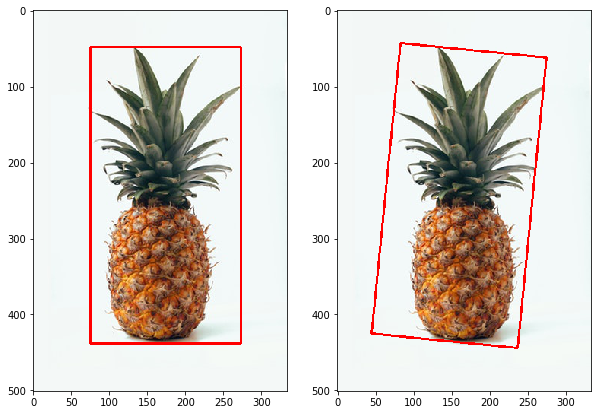

In [22]:
plt.figure(figsize = (10, 16))
plt.subplot(1, 2, 1); plt.imshow(img_box)
plt.subplot(1, 2, 2); plt.imshow(img_box_2)

We can also draw a convex shape contour with the function `cv2.convexHull()`. This takes a set of points and returns the convex hull from the given set. And by inputting this returned points as `contours` in `cv2.drawContours()`, we can get the convex contour as follows.

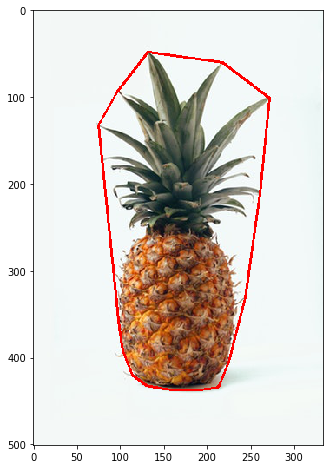

In [23]:
# Detect the convex contour
hull = cv2.convexHull(c_0)

img_copy = img.copy()
img_hull = cv2.drawContours(img_copy, contours = [hull], contourIdx = 0, 
                            color = (255, 0, 0), thickness = 2)
display(img_hull)

There are so many things to cover in contour detections. I encourage you to check [the documentation](https://docs.opencv.org/3.4.6/d3/d05/tutorial_py_table_of_contents_contours.html) and explore more options by yourself.

## A little bit of fun with masking

For the last exercise of this series, I'd like to have some fun time with doing image masking. We can add two different images with arithmetic operations such as image addition or bitwise operation. So our final task is attaching our Mr.pineapple on a man's left shoulder.

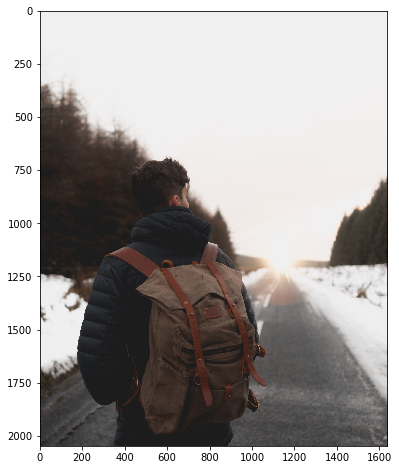

In [24]:
backpacker = cv2.imread(dir + 'images/backpacker.jpg')
backpacker = cv2.cvtColor(backpacker, cv2.COLOR_BGR2RGB)
display(backpacker)

We'll cut the region of interest (the shoulder part) from the large image and the small image as shown below. Note that the size of the two images (the height and the width of the image) should be the same here.

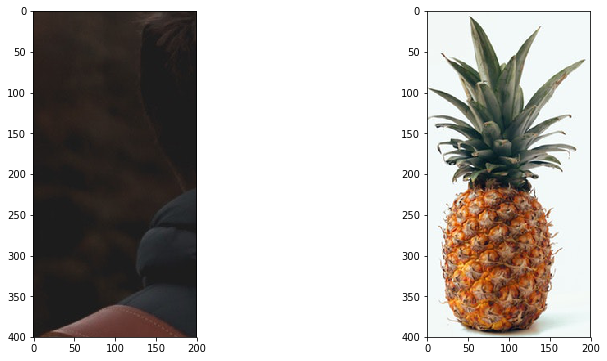

In [25]:
# Crop the small image and the region of interest (roi)
img_2 = img[40:440, 80:280]
roi = backpacker[750:1150, 300:500]

plt.figure(figsize = (10, 6))
plt.subplot(1, 3, 1); plt.imshow(roi)
plt.subplot(1, 3, 3); plt.imshow(img_2)

The next step is making the mask for each image. We're going to implement bitwise operation with the masks which should be a binary image. By thresholding the small image `img_2`, we create the mask.  And then with `cv2.bitwise_not()`, we make another mask which is exactly the opposite of the first one.

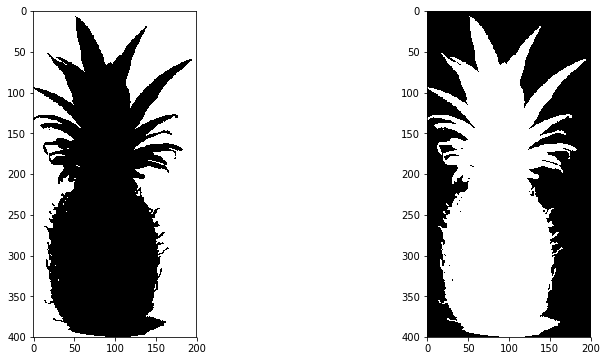

In [26]:
# Creating the mask for the roi and small image
img_gray = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(img_gray, 254/2+100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

plt.figure(figsize = (10, 6))
plt.subplot(1, 3, 1); plt.imshow(mask, cmap = 'gray')
plt.subplot(1, 3, 3); plt.imshow(mask_inv, cmap = 'gray')

If we implement the function `cv2.bitwise_and()` and the masks, they will pass only the white area of the image. Therefore if we apply the first mask to the `roi` image, we can set the background image from it. In the same way, if we apply the second one to the `img_2` image, we can make the foreground image with the fruit.

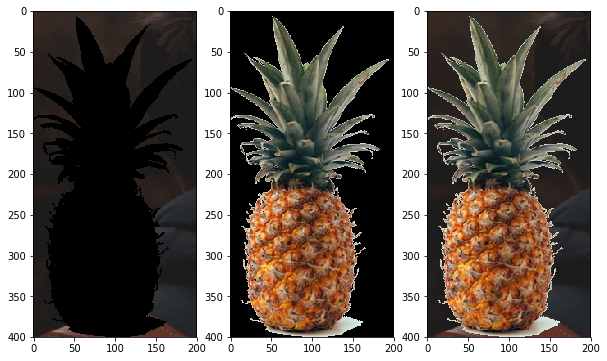

In [27]:
# Masking 
img_bg = cv2.bitwise_and(roi, roi, mask = mask)
img_fg = cv2.bitwise_and(img_2, img_2, mask = mask_inv)
dst = cv2.add(img_fg, img_bg)

plt.figure(figsize = (10, 6))
plt.subplot(1, 3, 1); plt.imshow(img_bg)
plt.subplot(1, 3, 2); plt.imshow(img_fg)
plt.subplot(1, 3, 3); plt.imshow(dst)

The outcome is a bit shanbles considering the shadow at the bottom but let's keep it. If you'd like to learn how the bitwise operation works, a detailed explanation can be found [here](https://stackoverflow.com/questions/44333605/what-does-bitwise-and-operator-exactly-do-in-opencv). Now we're ready to attach this combined image to the original one. So we can simply do this by putting the `dst` image at the `roi` position as shown below.

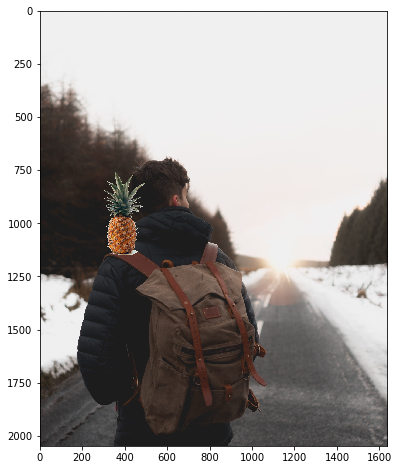

In [28]:
# Final output
backpacker[750:1150, 300:500] = dst
display(backpacker)

## Summary

From part 1 to part 4, we've learned quite a lot about the basics of image processing and computer vision. Did you enjoy all these tutorials so far? I hope you now get confident with the skills while following this series. 

If you're a complete starter in image processing, it's normal being unfamiliar with the terms and the usage of the OpenCV functions at first. The best way to practice is by implementing all of these by yourself. Pick any kind of images you like and just have fun with them. Changing color modes, rotating and resizing the image, masking and pasting it on a different image. Or you could also apply the detection technique of edges, corners and contours. While having fun by combining several preprocessing and trying different parameters, you can get used to OpenCV library faster without realizing.

## Extra Readings

- [Image moments on Wikipedia](https://en.wikipedia.org/wiki/Image_moment)
- [Image moments course on Udacity](https://www.youtube.com/watch?v=AAbUfZD_09s&t=71s)
- [Shape Matching using Hu Moments (C++/Python)](https://www.learnopencv.com/shape-matching-using-hu-moments-c-python/)
- [Find the Center of a Blob (Centroid) using OpenCV (C++/Python)](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)